# ICAT3190, Module 2, Excercises


## Task 1

1. Download the data file `FMI_weather_101485.csv` from moodle an read it using Pandas. The data file contains weather observations in Vaasa region in 1st of July 2018. Parse timestamps and notice that the field separator is space
1. Print the head of the data frame to check if you were able to parse it correctly. 
1. You will notice that the column names are not very convenient. They contain redundant metadata and the names may not be understandable in your domain. Replace the column names. 
  1. Delete the columns, which are not needed in this time. The columns to be deleted are shown in the table below. Use syntax `del(D['columname'])` to delete columns. You could have also told Pandas to read only the columns you specify in the first place.
  1. You can access the list of column names using `D.columns` attribute. Make a list of better column names and assign it into the `D.columns` according to the table below
  1. Check the data to find out if it contains outliers (any values which are very far from the other values in either direction). Use `D.describe()` to  study the statistics of all columns.
  1. `D.desribe()` shows also how many values there are for each column. Check how much missing data there are in each column.
1. Propose and try differnt methods for handling missing data for this dataframe. How do the affect to the statistics of the columns. 

  
| Original name | New name      | Explanation |
|---------------|---------------| ------------|
| obs-obs-1-1-t2m        | t    | Temperature |
| obs-obs-1-1-ws_10min   | U    | Average wind speed | 
| obs-obs-1-1-wg_10min   | Ug   | Wind gust speed |
| obs-obs-1-1-wd_10min   | Ud   | Wind direction |
| obs-obs-1-1-rh         | Rh   | Relative humidity |
| obs-obs-1-1-td         | DEL  | ? |
| obs-obs-1-1-r_1h       | Rfh  | Rainfall in 1h |
| obs-obs-1-1-ri_10min   | Rfmin| Rainfall in 10 min |
| obs-obs-1-1-snow_aws   | Sd   | Snow depth |
| obs-obs-1-1-p_sea      | p    | Air pressue, hPA |
| obs-obs-1-1-vis        | vis  | Visibility in meters|
| obs-obs-1-1-n_man      | DEL  | ? |
| obs-obs-1-1-wawa       | DEL  | ? |


In [164]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

D=pd.read_csv('Downloads/FMI_weather_101485.csv', sep=' ', parse_dates=[0], index_col=0, skipinitialspace=True)
D.columns = ['t', 'U', 'Ug', 'Ud', 'Rh', 'DEL', 'Rfh', 'Rfmin', 'Sd', 'p', 'vis', 'DEL', 'DEL']
del(D['DEL'])
print("Not filtered:")
print(D.describe())
print("\n")
print("------------------")
q = D.quantile(0.9)
f = D[D < q]
print("-------------------")
print("Filtered:")
print("\n")
print(f.describe())
print("--------------")
print("NaNs:")
print(D.isnull().sum())
print("NaNs: %d" % np.isnan(D.values).sum())
D.head()

Not filtered:
                t           U          Ug          Ud          Rh   Rfh  \
count  145.000000  145.000000  145.000000  145.000000  145.000000  23.0   
mean    14.491034    4.696552    7.235172   65.420690   55.006897   0.0   
std      3.552990    1.742859    2.880816  120.711184   18.248096   0.0   
min      7.400000    2.100000    3.000000    1.000000   34.000000   0.0   
25%     11.500000    3.000000    4.300000   10.000000   38.000000   0.0   
50%     15.800000    4.500000    7.500000   18.000000   48.000000   0.0   
75%     17.600000    6.300000   10.100000   27.000000   72.000000   0.0   
max     18.900000    8.300000   12.100000  360.000000   88.000000   0.0   

       Rfmin     Sd            p           vis  
count  143.0  145.0   145.000000    145.000000  
mean     0.0   -1.0  1026.133103  48664.255172  
std      0.0    0.0     1.472482   2868.094612  
min      0.0   -1.0  1023.700000  37273.000000  
25%      0.0   -1.0  1024.500000  49425.000000  
50%      0.0   -

,t,U,Ug,Ud,Rh,Rfh,Rfmin,Sd,p,vis
time,,,,,,,,,,
2018-07-01 00:00:00+00:00,8.2,2.8,3.5,360.0,85.0,0.0,0.0,-1.0,1026.5,50000.0
2018-07-01 00:10:00+00:00,7.8,2.6,3.3,357.0,85.0,NaN,0.0,-1.0,1026.5,50000.0
2018-07-01 00:20:00+00:00,7.5,2.5,3.0,357.0,87.0,NaN,0.0,-1.0,1026.6,50000.0
2018-07-01 00:30:00+00:00,7.4,2.7,3.6,353.0,88.0,NaN,0.0,-1.0,1026.7,50000.0
2018-07-01 00:40:00+00:00,7.7,3.1,3.9,353.0,87.0,NaN,0.0,-1.0,1026.8,50000.0


## Task 2

1. Plot the temperature and wind speed against time axis. 
1. Switch grids on, set the names of x and y axis
1. Save the figure in .pdf and .png forms. What is the difference between these two image formats

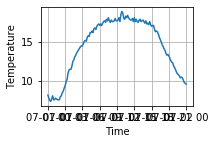

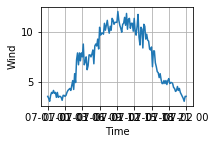

In [18]:
## Your code goes here
import pandas as pd
import matplotlib.pyplot as mp

D=pd.read_csv('Downloads/FMI_weather_101485.csv', sep=' ', parse_dates=[0], index_col=0, skipinitialspace=True)
D.columns = ['t', 'U', 'Ug', 'Ud', 'Rh', 'DEL', 'Rfh', 'Rfmin', 'Sd', 'p', 'vis', 'DEL', 'DEL']
del(D['DEL'])
D.head()

##Now t is Temperature

f1 = mp.figure(1)
p1 = D['t']
mp.subplot(2,2,1)
mp.plot(p1)
mp.xlabel('Time')
mp.ylabel('Temperature')
mp.grid()

##Now Ug is WindGustSpeed

f2 = mp.figure(2)
p2 = D['Ug']
mp.subplot(2,2,2)
mp.plot(p2)
mp.xlabel('Time')
mp.ylabel('Wind')
mp.grid()

mp.show()
%matplotlib inline

##Save PDF & PNG
f1.savefig('Temperatureprofile.pdf')
f2.savefig('Windprofile.png')

##PDF is good for sharing because it is an open file format. It can be viewed with a professional software
##PNG compresses the images in a way where it is hard to detect a degredation of quality

## Task 3

Study the pairplot (or scattermatrix) below. It shows pairwise dependencies between variables. Can you observe any interesting patterns in the data? Which variable are linearly dependent on each other? Which are dependent in some other way? Can you predict correlations from the figure?

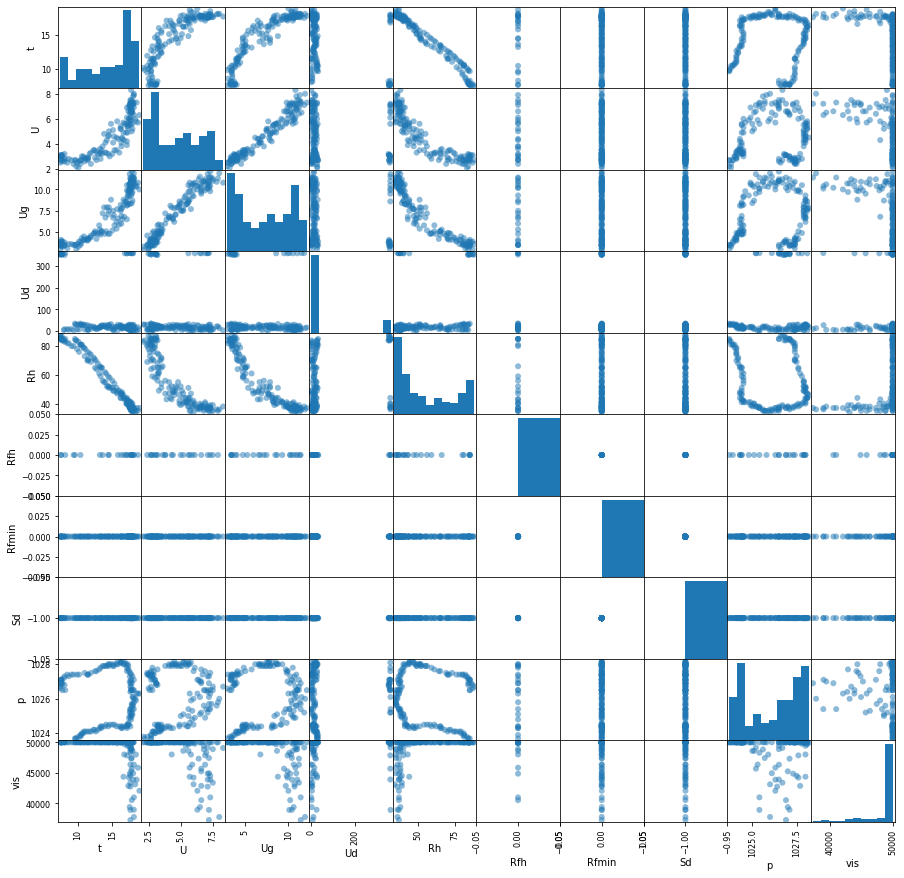

In [21]:
import pandas as pd

D=pd.read_csv('Downloads/FMI_weather_101485.csv', sep=' ', parse_dates=[0], index_col=0, skipinitialspace=True)
D.columns = ['t', 'U', 'Ug', 'Ud', 'Rh', 'DEL', 'Rfh', 'Rfmin', 'Sd', 'p', 'vis', 'DEL', 'DEL']
del(D['DEL'])
pd.plotting.scatter_matrix(D, figsize=(15,15), marker='o');

In [ ]:
##From the scattermatrix it is possible to see how much the variables (ex1 labels) correlate with each other (for i.e. speed of the wind correlates with the temperature), it seems that when the WindSpeed Ug goes higher, also the Temperature goes higher.
##Labels for the variables can be seen from Ex1
##Temperature is linearly dependant from Wind speed, Windy Vaasa!